# Изученые данных о компьютерных играх
В данном проекте будут выявлены определяющие успешность игр законмерности, проанализированы факторы, влияющие на выбор пользователя, и непосредственно паттерны их поведения.
## Импорт данных и изучение в первом приближении

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
initial_data = pd.read_csv('/datasets/games.csv')
initial_data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
display(initial_data.head(20))
print('Жанры:', initial_data['genre'].unique())
print('Платформы:', initial_data['platform'].unique())
print('Рейтинги:', initial_data['rating'].unique())
initial_data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Жанры: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Платформы: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Рейтинги: ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage

## Предобработка данных
##### Чек-лист предобработки данных
- [x] Удалить все строки с пропусками, за исключением пропусков в 'critic_score', 'user_score', 'rating'
- [x] Проверить на дубликаты и удалить в случае, если они есть
- [x] Заполнить пропуски в 'user_score' в зависимости либо от суммарного объема продаж, либо от объема продаж в отдельных областях (решим, когда увидим корреляцию)
- [x] Заполнить пропуски 'rating' значением 'unknown'
- [x] Заменить тип 'year_of_release' на integer

In [2]:
data = initial_data.dropna(subset = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'])

print('Обнаружено ', data.duplicated().sum(), ' дубликатов')

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

correlation_research_data = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 'user_score', 'critic_score']].dropna()
correlation_research_data = correlation_research_data[correlation_research_data['user_score'] != 'tbd']
correlation_research_data['user_score'] = correlation_research_data['user_score'].astype('float')
display(correlation_research_data.corr())

dist_min = data['total_sales'].min()
dist_max = data['total_sales'].max()

def category_numeric(row): #функция назначает категорию числовому значению, разбивая весь массив на 12 категорий
    categories_number = 14
    _min = dist_min
    _max = dist_max
    size = _max - _min
    delta = size / categories_number
    for i in range(categories_number):
        if row >= _min and row < (_min + delta):
            return (str(int(_min)) + ' - ' + str(int(_min + delta)))
        else:
            _min += delta

data['sales_category'] = data['total_sales'].apply(category_numeric)

def categorial_fillna(df, column_with_nan, categorial_column, method_fill): #функция, которая обрабатывает df, заполняя NaN-ы с учетом категоризации по указанному столбцу
    categories = df[categorial_column].unique()
    df_integer = df[df[column_with_nan] != 'tbd']
    df_integer[column_with_nan] = df_integer[column_with_nan].astype('float')
    for category in categories:
        if method_fill == 'median':
            median = df_integer[df_integer[categorial_column]==category][column_with_nan].sort_values().median()
            median = round(median, 1)
            df.loc[df[categorial_column]==category, column_with_nan] = df[df[categorial_column]==category][column_with_nan].fillna(value = median)
        elif method_fill == 'mean':
            mean = df_integer[df_integer[categorial_column]==category][column_with_nan].sort_values().mean()
            mean = round(mean, 1)
            df.loc[df[categorial_column]==category, column_with_nan] = df[df[categorial_column]==category][column_with_nan].fillna(value = mean)
    return df


data = categorial_fillna(data, 'user_score', 'sales_category', 'mean')
data['rating'].fillna(value = 'unknown', inplace = True)
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

Обнаружено  0  дубликатов


,na_sales,eu_sales,jp_sales,other_sales,total_sales,user_score,critic_score
na_sales,1.000000,0.841701,0.468377,0.726931,0.955790,0.085827,0.232922
eu_sales,0.841701,1.000000,0.519490,0.716493,0.939253,0.055798,0.212843
jp_sales,0.468377,0.519490,1.000000,0.394698,0.613339,0.127920,0.147178
other_sales,0.726931,0.716493,0.394698,1.000000,0.804153,0.057182,0.191189
total_sales,0.955790,0.939253,0.613339,0.804153,1.000000,0.088415,0.237087
user_score,0.085827,0.055798,0.127920,0.057182,0.088415,1.000000,0.579671
critic_score,0.232922,0.212843,0.147178,0.191189,0.237087,0.579671,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         16444 non-null object
rating             16444 non-null object
total_sales        16444 non-null float64
sales_category     16444 non-null object
dtypes: float64(6), int64(1), object(6)
memory usage: 1.8+ MB


### Результаты 
- Удалили все строки с пропусками, за исключением пропусков в 'critic_score', 'user_score', 'rating'
- Дубликаты не обнаружены
- Как и предполагалось, 'user_score' более всего связан с суммарным объемом продаж (см. корреляционную матрицу - коэффициент 0.88). Так и заполним.
- Заполнили 'rating'
- Изменили тип данных 'year_of_release'
- Что касается 'critic_score', его лучше оставить нетронутым, поскольку максимальная корреляция у него наблюдается с 'user_score' и равна 0.58. Значение слишком мало, чтобы можно было на основании выводов о его достаточности заполнять все пропуски (а их больше половины столбца). Вероятно, критики просто обращают внимание далеко не на все игры.

## Исследовательский анализ данных
##### Чек-лист исследовательского анализа данных
- [x] Построить гистограмму по годам и сделать выводы
- [x] Построить график продаж по годам для самых популярных платформ и ответить на вопрос о длине "жизненного цикла" платформы
- [x] Выделить актуальные данные
- [x] Определить "умирающие" и потенциально прибыльные платформы
- [x] Построить "ящики с усами" по продажам с разбивкой по платформам
- [x] Посмотреть связь продаж с отзывами критиков и пользователей
- [x] Сделать выводы относительно связи объема продаж с жанром

[Text(0, 0.5, 'Частота'),
 Text(0.5, 0, 'Год'),
 Text(0.5, 1.0, 'Количество выпущенных игр по годам')]

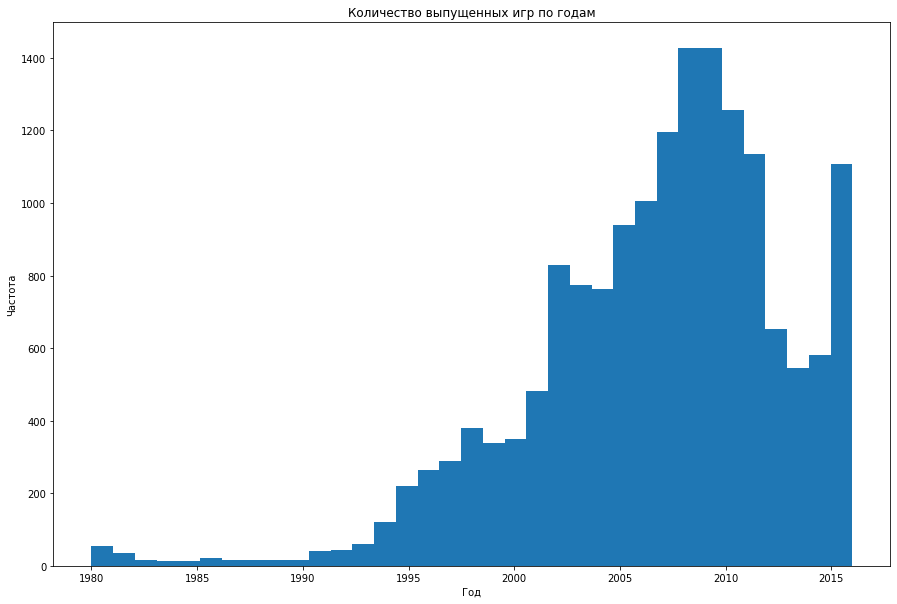

In [3]:
data['year_of_release'].plot(kind = 'hist', bins = 35, figsize = (15, 10)).set(xlabel = 'Год', ylabel = 'Частота', title = 'Количество выпущенных игр по годам')

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


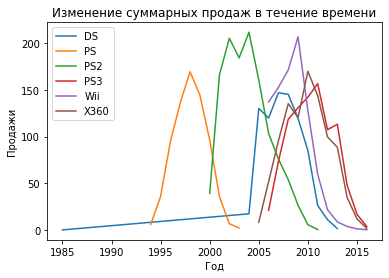

In [4]:
print(data.groupby(by = 'platform')['total_sales'].sum().sort_values(ascending = False))
popular = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
analysis_data = data.query('platform in @popular')
analysis_pivot = analysis_data.pivot_table(index = ['year_of_release', 'platform'], values = 'total_sales', aggfunc = 'sum').reset_index()
ax = plt.subplot()
for key, group in analysis_pivot.groupby('platform'):
    ax.plot(group.year_of_release, group.total_sales, label = key)
ax.set_xlabel('Год')
ax.set_ylabel('Продажи')
ax.set_title('Изменение суммарных продаж в течение времени')
plt.legend()
plt.show()

### Результаты
- Рост производства видеоигр произошел в промежутке между 1995 и 2000. Далее - экспоненциальный рост вплоть до 2009. С 2010 до 2013 был резкий спад, а далее - резкий рост. Возможно, такая аномалия связана с кризисом 2008 года.
- Срок "жизненного цикла" одной платформы, судя по графику, равен примерно 10 лет. Все самые популярные платформы к 2016 году перестали быть популярными. Нужно посмотреть на более актулаьные данные: раз самые популярные платформы стали "падать" с 2010, значит, им на замену пришли какие-то новые.

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


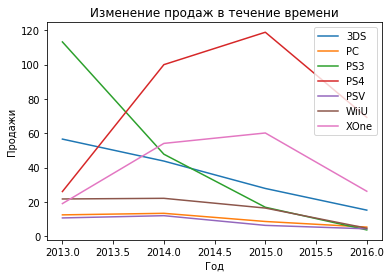

In [5]:
actual_data = data.query('year_of_release >= 2013')
old_data = data.query('year_of_release < 2013')
data = actual_data
print(actual_data.groupby(by = 'platform')['total_sales'].sum().sort_values(ascending = False))
popular_actual = ['PS4', 'PS3', 'XOne', '3DS', 'WiiU', 'PC', 'PSV']
analysis_data_actual = actual_data.query('platform in @popular_actual')
analysis_pivot = analysis_data_actual.pivot_table(index = ['year_of_release', 'platform'], values = 'total_sales', aggfunc = 'sum').reset_index()
ax = plt.subplot()
for key, group in analysis_pivot.groupby('platform'):
    ax.plot(group.year_of_release, group.total_sales, label = key)
ax.set_xlabel('Год')
ax.set_ylabel('Продажи')
ax.set_title('Изменение продаж в течение времени')
plt.legend()
plt.show()

### Результаты 
- Буду честен: первое, что бросается в глаза, - "умирают" все плаформы. Возможно, имеет место тренд общего снижения популярности видеоигр. Но не будем о грустном, еще есть "живчики".
- Лидеры продаж за последние годы - PS4, PS3, XBox One. Их и будем считать наиболее перспективными.

[Text(0, 0.5, 'Платформы'),
 Text(0.5, 0, 'Продажи'),
 Text(0.5, 1.0, 'Распределение продаж игр на разных платформах')]

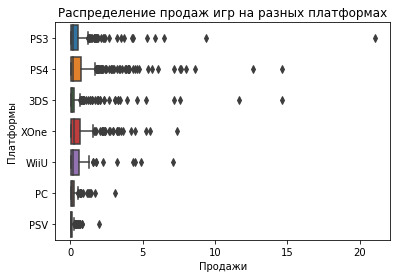

In [6]:
import seaborn as sns
%matplotlib inline
box_data = data.query('platform in @popular_actual')
sns.boxplot(y = 'platform', x = 'total_sales', data = box_data).set(title = 'Распределение продаж игр на разных платформах', xlabel = 'Продажи', ylabel = 'Платформы')

### Результаты
Как видно из графиков, большая часть игр приносят сравнительно небольшие продажи, притом это относится к играм всех платформ. Однако очень много выбросов (игр-хитов), которые подаются в десятки раз лучше обычных. О распределении: длинный хвост, сильно смещено вправо.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 16 to 16710
Data columns (total 13 columns):
name               322 non-null object
platform           322 non-null object
year_of_release    322 non-null int64
genre              322 non-null object
na_sales           322 non-null float64
eu_sales           322 non-null float64
jp_sales           322 non-null float64
other_sales        322 non-null float64
critic_score       120 non-null float64
user_score         322 non-null float64
rating             322 non-null object
total_sales        322 non-null float64
sales_category     322 non-null object
dtypes: float64(7), int64(1), object(5)
memory usage: 35.2+ KB


,user_score,critic_score,total_sales
user_score,1.000000,0.599920,-0.051016
critic_score,0.599920,1.000000,0.333807
total_sales,-0.051016,0.333807,1.000000


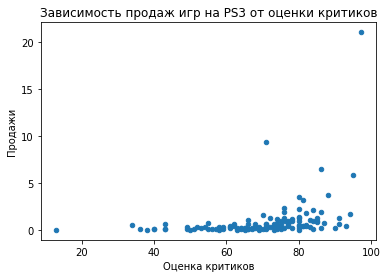

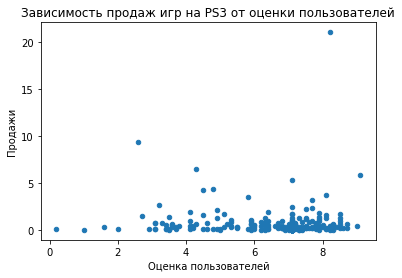

In [7]:
data_ps3 = data.query('platform == "PS3"')
data_without_tbd = data_ps3[data['user_score'] != 'tbd']
data_without_tbd['user_score'] = data_without_tbd['user_score'].astype('float')
data_without_tbd.info()
data_ps3.plot(kind = 'scatter', y = 'total_sales', x = 'critic_score').set(xlabel = 'Оценка критиков', ylabel = 'Продажи', title = 'Зависимость продаж игр на PS3 от оценки критиков')
data_without_tbd.plot(kind = 'scatter', y = 'total_sales', x = 'user_score').set(xlabel = 'Оценка пользователей', ylabel = 'Продажи', title = 'Зависимость продаж игр на PS3 от оценки пользователей')
data_without_tbd[['user_score', 'critic_score', 'total_sales']].corr()

### Результаты
- Наблюдается связь между оценкой критиков и объемом продаж. До рейтинга 80 связи практически нет, но если критики ставят больше 80, то речь идет об игре с  относительно высокими продажами. Больше 90 - часто с критически высокими продажами.
- Судя по корреляционной матрице, зависимости между пользовательским рейтингом и продажами нет. Если анализировать график, то можно сказать, что игры с высокими продажами (очевидно, популярные) иногда имеют довольно низкую оценку. Возможно это объясняется тем, что "хиты" привлекают к себе много внимания, что, в том числе, вызывает диаметрально противополжные реакции у разных людей.

,genre,total_sales
genre,1.000000,0.113313
total_sales,0.113313,1.000000


,Жанр,Суммарные продажи,Средние продажи
0,Action,321.87,0.110
1,Adventure,23.64,0.030
2,Fighting,35.31,0.125
3,Misc,62.82,0.100
4,Platform,42.63,0.225
5,Puzzle,3.17,0.060
6,Racing,39.89,0.120
7,Role-Playing,145.89,0.125
8,Shooter,232.98,0.450
9,Simulation,21.76,0.100


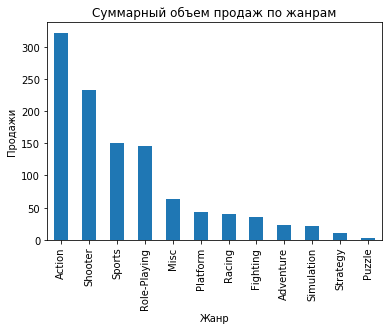

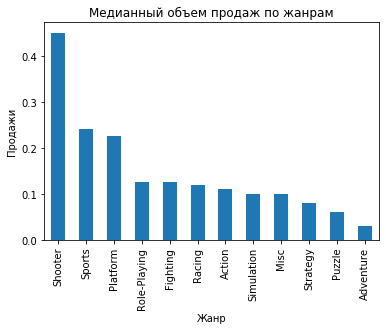

In [8]:
pivot_genre = data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').reset_index()
pivot_genre.sort_values('total_sales', ascending = False).plot(x = 'genre', y = 'total_sales', kind = 'bar', legend = None).set(xlabel = 'Жанр', ylabel = 'Продажи', title = 'Суммарный объем продаж по жанрам')
corr_data = data[['genre', 'total_sales']]
corr_data['genre'] = corr_data['genre'].astype('category').cat.codes
display(corr_data.corr())
pivot_genre_mean = pivot_genre
pivot_genre = data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').reset_index()
pivot_genre.sort_values('total_sales', ascending = False).plot(x = 'genre', y = 'total_sales', kind = 'bar', legend = None).set(xlabel = 'Жанр', ylabel = 'Продажи', title = 'Медианный объем продаж по жанрам')
stat = pd.merge(pivot_genre_mean, pivot_genre, on = 'genre')
stat.columns = ['Жанр', 'Суммарные продажи', 'Средние продажи']
display(stat)

### Результаты
- По суммарным продажам лидируют action, shooter, sports, role-playing и misc
- По средним продажам - shooter, sports, platform, role-playing, racing
- Если судить по матрице корреляции, то связи между проадажми и жанром нет
##### ТОП-5:
1) Shooter - много хитов и высокие средние продажи <br>
2) Sports - сравнительно немного хитов, то неплохие медианные продажи <br>
3) Role-Playing - "золотая середина" между стабильностью средних продаж и частотой хитов <br>
4) Platform - очень немного хитов, но третье место по медианным продажам <br>
5) Action - первое место по суммарным продажам (сильные хиты), но весьма посредственные медианные продажи <br>

## Выводы
- ТОП-5 жанров: Shooter, Sports, Role-Playing, Platform, Action
- ТОП-5 платформ: PS4, PS3, XOne, 3DS, X360
- Жизненный цикл платформы - примерно 10 лет
- С 2014 резкий рост выпуска игр
- Продажи никак не связаны с оценками пользователей, слабо связаны с оценками критиков
- Основной объем продаж - "хиты"

## Изучение поведения отдельных регионов
##### Чек лист:
- [x] Определить самые популярные платформы в каждом регионе (ТОП-5)
- [x] Определить самые популярные жанры в каждом регионе (ТОП-5)
- [x] Понять, влияет ли рейтинг ESRB на продажи в регионах

In [9]:
pivot_na = data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index()
top5_na = pivot_na['genre'].head().values.tolist()
pivot_eu = data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).reset_index()
top5_eu = pivot_eu['genre'].head().values.tolist()
pivot_jp = data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).reset_index()
top5_jp = pivot_jp['genre'].head().values.tolist()
print('Самые популярные жанры в Северной Америке:', ', '.join(top5_na))
print('Самые популярные жанры в Европе:', ', '.join(top5_eu))
print('Самые популярные жанры в Японии:', ', '.join(top5_jp))

Самые популярные жанры в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc
Самые популярные жанры в Европе: Action, Shooter, Sports, Role-Playing, Racing
Самые популярные жанры в Японии: Role-Playing, Action, Misc, Fighting, Shooter


In [10]:
pivot_na = data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index()
top5_na = pivot_na['platform'].head().values.tolist()
pivot_eu = data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).reset_index()
top5_eu = pivot_eu['platform'].head().values.tolist()
pivot_jp = data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).reset_index()
top5_jp = pivot_jp['platform'].head().values.tolist()
print('Самые популярные платформы в Северной Америке:', ', '.join(top5_na))
print('Самые популярные платформы в Европе:', ', '.join(top5_eu))
print('Самые популярные платформы в Японии:', ', '.join(top5_jp))

Самые популярные платформы в Северной Америке: PS4, XOne, X360, PS3, 3DS
Самые популярные платформы в Европе: PS4, PS3, XOne, X360, 3DS
Самые популярные платформы в Японии: 3DS, PS3, PSV, PS4, WiiU


### Результаты 
Северная Америка и Европа практически не отличаются по популярным платформам и жанрам. Основное отличие находится между ними и Японией. Вероятно, это отличие культур востока и запада: Европа и Северная Америка находятся на западе, а Япония - исключительный пример восточной культуры. Различия во всем, в том числе и в трендах.

In [11]:
data = data.replace({'rating': {'T': '13+', 'M': '17+', 'E': '0+', 'E10+': '10+'}})
pivot_rating_na = data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index()
pivot_rating_eu = data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).reset_index()
pivot_rating_jp = data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).reset_index()
display(pivot_rating_na, pivot_rating_eu, pivot_rating_jp)

,rating,na_sales
0,17+,165.21
1,unknown,89.42
2,0+,79.05
3,10+,54.24
4,13+,49.79


,rating,eu_sales
0,17+,145.32
1,0+,83.36
2,unknown,78.91
3,10+,42.69
4,13+,41.95


,rating,jp_sales
0,unknown,85.05
1,13+,20.59
2,0+,15.14
3,17+,14.11
4,10+,5.89


### Результаты

Снова такой же результат: практически одно и то же для Северной Америки и Европы: лидируют игры с пометкой 17+, на вторм месте - 0+. Видимо, западные люди любят контраст. В Японии же наиболее популярны игры с рейтингом 13+. Примерно одинаково популярны 0+ и 17+. Наименее популярны игры с рейтингом 10+. В общем, японцы предпочитают "золотую середину", иногда отдавая предпочтения 0+ и 17+, а американцы и европейцы любят "крайние" рейтинги. <br>
Неизвестный рейтинг сложно интерпретировать - возможно сумма продаж таких игр высока из-за того, что подразумевается множетсво рейтингов, объединенных одним. Говорить однозначно нельзя, поэтому проигнорируем позицию unknown.

### Выводы 
1) ТОП-5 платформ: <br>
- Япония: 3DS, PS3, PSV, PS4, WiiU
- Европа и Северная Америка: PS4, XOne, X360, PS3, 3DS <br>
2) ТОП-5 жанров: <br>
- Япония: Role-Playing, Action, Misc, Fighting, Shooter
- Европа и Северная Америка: Action, Shooter, Sports, Role-Playing, Misc // Role-Playing <br>
3) Влияние рейтинга на продажи: <br>
В Европе и Северной Америке лучше всего продаются игры с рейтингом 17+ и 0+. Для Японии предпочитетельнее всего 13+, 17+ и 0+ на втором месте.

## Статистический анализ данных
##### Чек-лист:
- [x] Проверить гипотезу о том, что средние пользовательские рейтинги платформ PC и XOne равны
- [x] Проверить гипотезу о том, что средние пользовательские рейтинги для жанров Action и Sports не равны.

### Формулирование гипотез
1) <br>
Н0: Средние распределений user_score для платформ PC и XOne равны <br>
H1: не равны <br>
2) <br>
Н0: Средние распределений user_score для жанров Action и Sports равны <br>
H1: не равны <br>

In [12]:
import scipy.stats as st
actual_data = actual_data.query('user_score != "tbd"')
actual_data['user_score'] = actual_data['user_score'].astype('float')
user_score_pc = actual_data.query('platform == "PC"')['user_score']
user_score_xone = actual_data.query('platform == "XOne"')['user_score']
results = st.ttest_ind(user_score_pc, user_score_xone)
print('p-value = ',results.pvalue)
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('Средняя оценка игр на PC равна', user_score_pc.mean())
print('Средняя оценка игр на XOne равна', user_score_xone.mean())

p-value =  0.06794140576668824
Не получилось отвергнуть нулевую гипотезу
Средняя оценка игр на PC равна 6.400543478260869
Средняя оценка игр на XOne равна 6.65635593220339


In [13]:
user_score_action = actual_data.query('genre == "Action"')['user_score']
user_score_sports = actual_data.query('genre == "Sports"')['user_score']
results2 = st.ttest_ind(user_score_action, user_score_sports)
print('p-value = ',results2.pvalue)
if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('Средняя оценка игр в жанре Action равна', user_score_action.mean())
print('Средняя оценка игр в жанре Sports равна', user_score_sports.mean())

p-value =  7.446705969780431e-41
Отвергаем нулевую гипотезу
Средняя оценка игр в жанре Action равна 6.958782849239279
Средняя оценка игр в жанре Sports равна 5.617910447761193


### Результаты
- Исходя из проверки первой гипотезы, мы можем сказать, что пользовательские средние рейтинги игр для платформ PC и XOne близки по своим значениям. Сравнивая их реальные величины, мы видим, что разница вправду невелика
- Исходя из проверки второй гипотезы, мы можем сказать, что пользовательские средние рейтинги игр жанров Action и Sports различаются. Сравнивая их реальные величины, мы видим, что разница вправду значительна

## Выводы
- В 2017 году, вероятно, будет рост продаж видеоигр
- В 2017 году, вероятно, будут популярны платформы PS4, PS3 и Xbox One
- В 2017 году может появится несколько новых платформ, поскольку продажи игр на существующих падают
- В 2017 году в Северной Америке и в Европе стоит выпускать игры жанра Action и Shooter с рейтингом 17+ или 0+ на PS4, PS3 и Xbox One
- В 2017 году в Японии стоит выпускать игры жанра Role_Playing и Action с рейтингом 13+, иногда с 17+ и 0+ на 3DS, PS3 и PSV
- Пользовательсикй рейтинг неважен, оценки критиков играют небольшую роль
- Средние пользовательские оценки игр на PC и XBox One примерно равны
- Средние пользовательские оценки игр в жанрах Action и Sports отличаются